# Metropolis Algorithem


$$
p(x) = \frac{ \exp(-x^2)(2+ \sin(5x) + sin(2x)) }{ \int_{-\infty}^{\infty} \exp(-u^2)(2+ \sin(5u) + sin(2u)) du }
$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import integrate, stats

FIGSIZE = (9, 6)
SAMPLESIZE = 100000
BURN_IN = int(SAMPLESIZE * 0.25)

In [2]:
def target(x: np.ndarray) -> np.ndarray:
    return np.exp(-(x**2)) * (2 + np.sin(5 * x) + np.sin(2 * x))

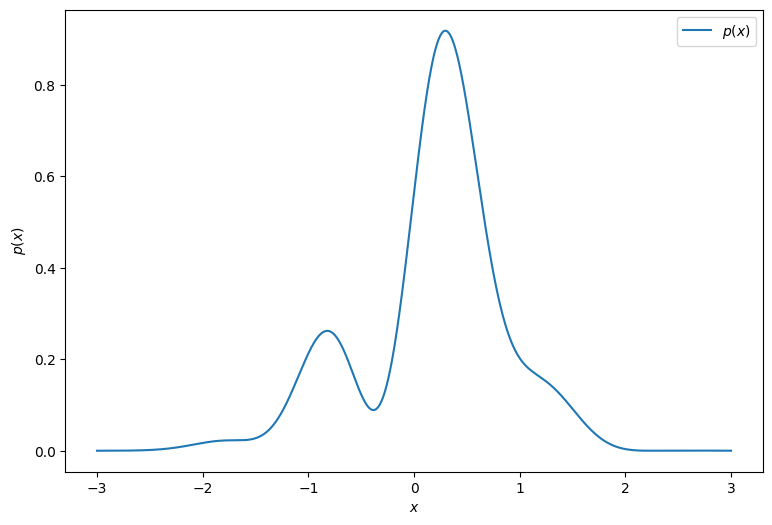

In [3]:
x = np.linspace(-3, 3, 10000)
dnominator = integrate.quad(target, -np.inf, np.inf)
y = target(x) / dnominator[0]

plt.figure(figsize=FIGSIZE)
plt.plot(x, y, label=r"$p(x)$")
plt.xlabel(r"$x$")
plt.ylabel(r"$p(x)$")
plt.legend()
# plt.grid()
# plt.savefig("target_plot.png")
plt.show()

In [4]:
def MetropolisSample(pdf, init_state, step_size, sample_size=SAMPLESIZE):
    current_state = init_state
    samples = []
    for _ in range(sample_size):
        candidate_state = np.random.normal(
            loc=current_state, scale=step_size
        )  # jumping probabitlity
        accept_prob = np.minimum(
            1.0, pdf(candidate_state) / pdf(current_state)
        )  # acceptance probability
        if np.random.uniform() < accept_prob:
            current_state = candidate_state
        samples.append(current_state)
    return np.array(samples)

## Geweke Test

$ z = \frac{ \bar{X_1} - \bar{X_2} }{ \sqrt{\text{Var}(X_1) +\text{Var}(X_2) } } $


In [5]:
# running mean
def RunningMeans(sample):
    cumulative_sum = np.cumsum(sample)
    indices = np.arange(1, len(cumulative_sum) + 1)
    running_means = cumulative_sum / indices
    return running_means

### Sample 1

init step = 0
step size = 2


In [6]:
np.random.seed(1)
samples = MetropolisSample(pdf=target, init_state=0, step_size=2)
print(f"Mean: {np.mean(samples):0.4f}\nVariance: {np.var(samples):.4f}")

Mean: 0.1866
Variance: 0.4754


Text(0.5, 0, 'Number of Iteration')

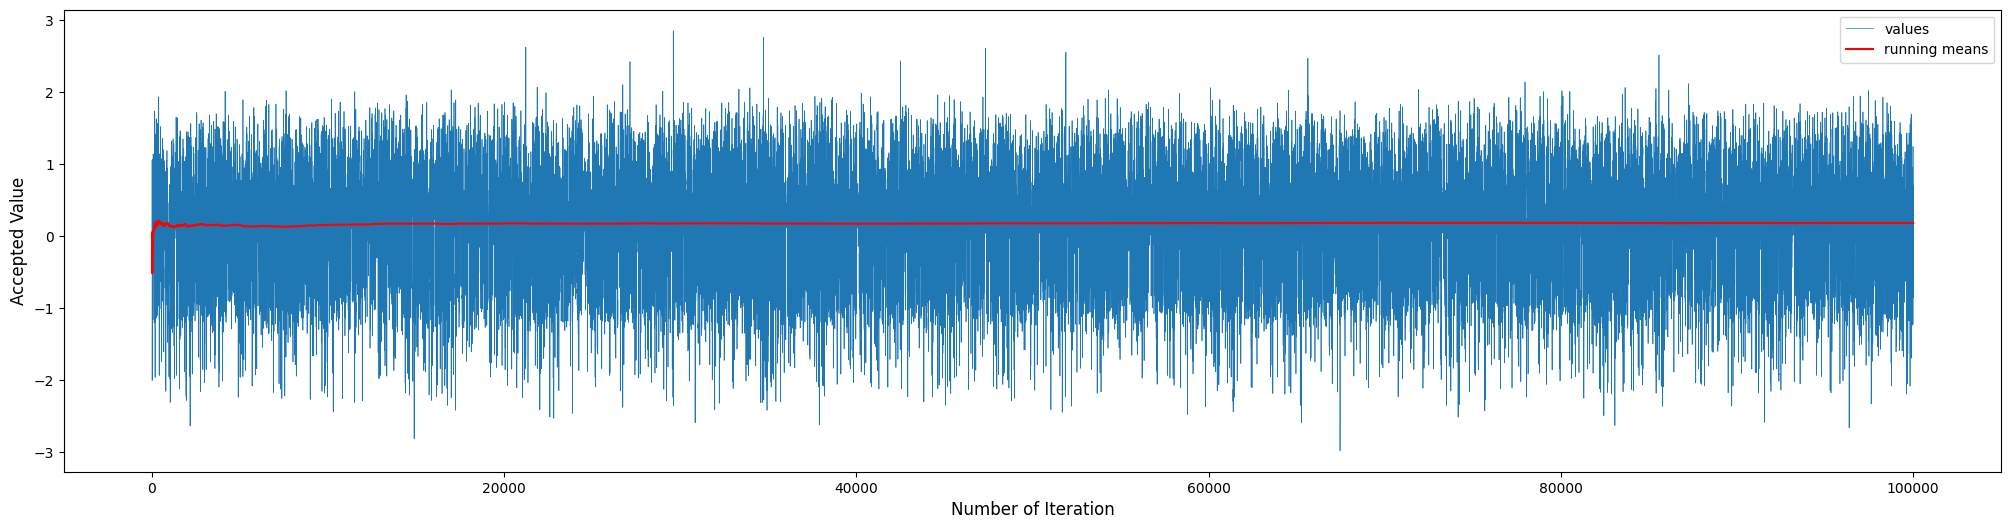

In [7]:
plt.figure(figsize=(25, 6))
sns.lineplot(
    x=range(SAMPLESIZE),
    y=samples,
    # color="k",
    linewidth=0.5,
    label="values",
)
sns.lineplot(
    x=range(SAMPLESIZE),
    y=RunningMeans(samples),
    color="r",
    label="running means",
)
plt.ylabel("Accepted Value", fontsize=12)
plt.xlabel("Number of Iteration", fontsize=12)
# plt.savefig("accepted_value_of_sample1.png")

In [8]:
# reboving burn-in
print(f"Mean: {samples[BURN_IN:].mean():0.4f}")
print(f"Variance: {samples[BURN_IN:].var():0.4f}")

Mean: 0.1900
Variance: 0.4751


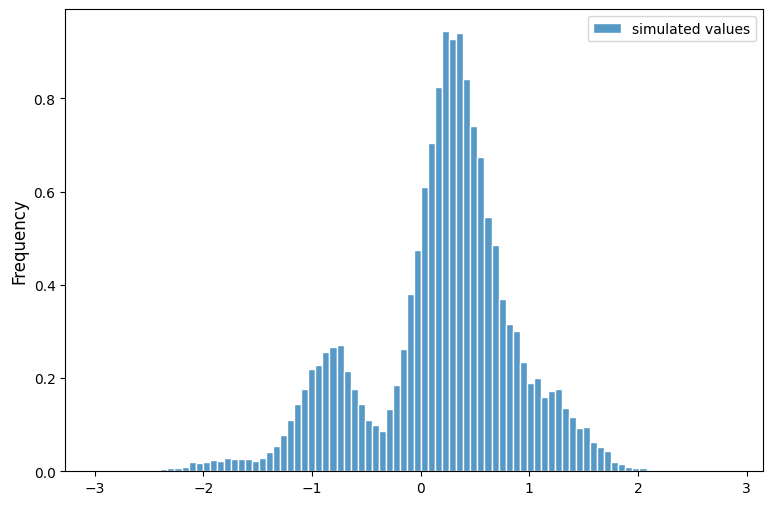

In [9]:
plt.figure(figsize=FIGSIZE)
sns.histplot(
    samples[BURN_IN:],
    stat="density",
    linewidth=1,
    # color="black",
    edgecolor="white",
    # kde=True,
    bins=90,
    label="simulated values",
)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
# plt.savefig("sample1_hist.png")

In [10]:
# for geweke test in r
df = pd.DataFrame(samples[BURN_IN:])
df.to_csv("sample1.csv")

In [11]:
# cumelative avarage
running_means = RunningMeans(samples[BURN_IN:])

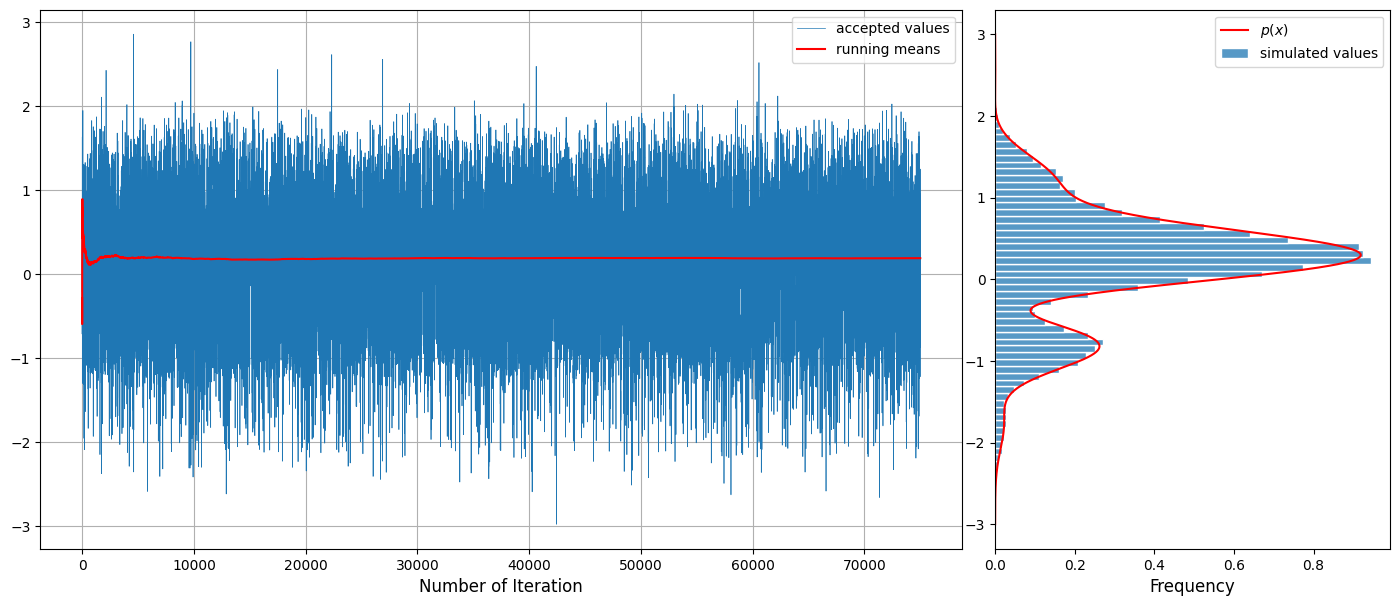

In [14]:
# Create subplots with specified width ratios
fig, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={"width_ratios": [7, 3]})
plt.subplots_adjust(right=0.8, wspace=0.05)

# First subplot: line plot
axs[0].grid()
sns.lineplot(
    ax=axs[0],
    x=range(SAMPLESIZE - BURN_IN),
    # color="k",
    linewidth=0.5,
    y=samples[BURN_IN:],
    label="accepted values",
)
sns.lineplot(
    ax=axs[0],
    x=range(len(running_means)),
    y=running_means,
    color="red",
    label="running means",
)
axs[0].set_xlabel("Number of Iteration", fontsize=12)
# axs[0].set_ylabel("Accepted Value", fontsize=12)

# Second subplot: histogram plot
sns.histplot(
    ax=axs[1],
    y=samples[BURN_IN:],
    stat="density",
    # color="black",
    edgecolor="white",
    # kde=True,
    linewidth=1,
    bins=70,
    label="simulated values",
)
plt.plot(y, x, color="r", label=r"$p(x)$")
axs[1].set_xlabel("Frequency", fontsize=12)

plt.legend()
# Show the plot
plt.show()

### Sample 2

init state = -1, step size = 2


In [17]:
np.random.seed(2)
samples2 = MetropolisSample(pdf=target, init_state=-1, step_size=2)
print(f"Mean: {np.mean(samples2):.4f}\nVariance: {np.var(samples2):.4f}")

Mean: 0.1832
Variance: 0.4641


Text(0.5, 0, 'Number of Iteration')

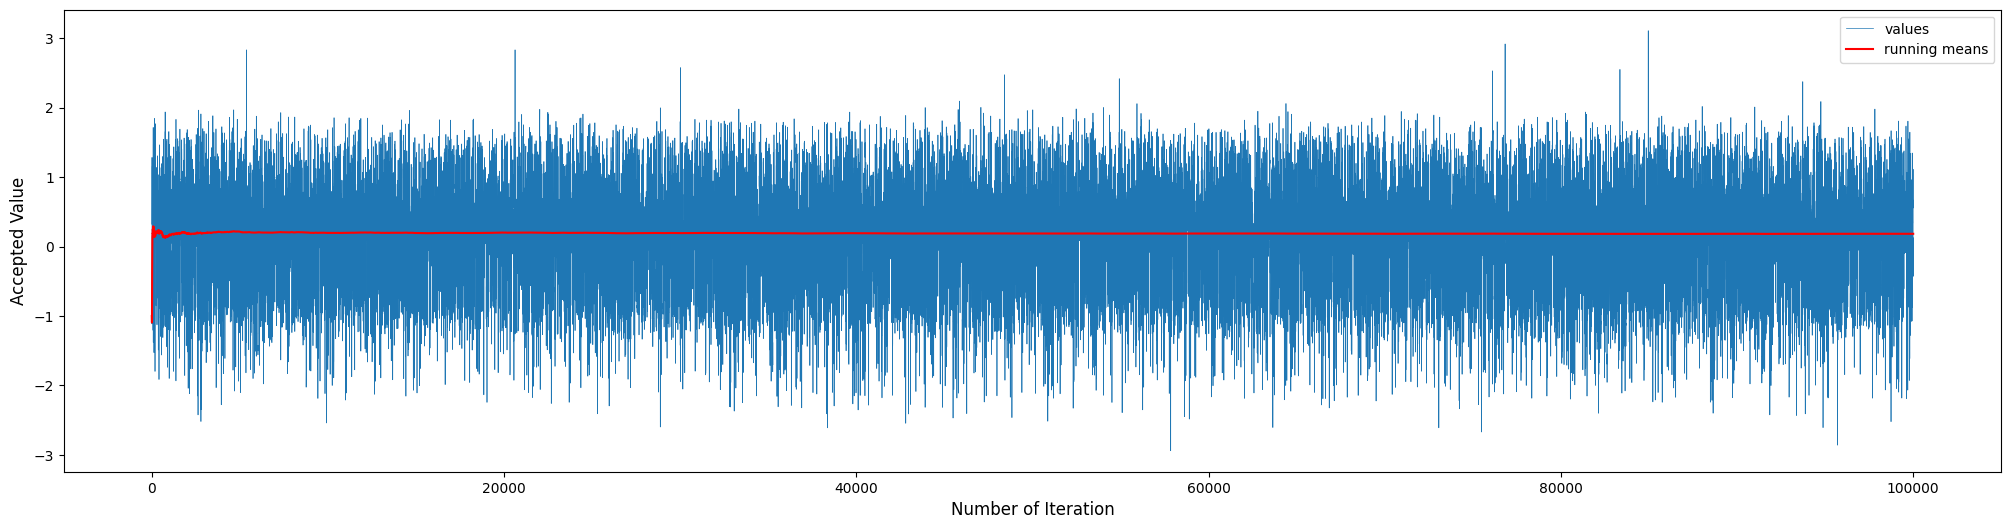

In [18]:
plt.figure(figsize=(25, 6))
sns.lineplot(
    x=range(SAMPLESIZE), 
    y=samples2,
    # color="k",
    linewidth=0.5,
    label="values"
)
sns.lineplot(
    x=range(SAMPLESIZE),
    y=RunningMeans(samples2),
    color="r",
    label="running means",
)
plt.ylabel("Accepted Value", fontsize=12)
plt.xlabel("Number of Iteration", fontsize=12)

In [19]:
# reboving burn-in
print(f"Mean: {samples2[BURN_IN:].mean():.5f}")
print(f"Variance: {samples2[BURN_IN:].var():.5f}")

Mean: 0.17842
Variance: 0.47186


Text(0, 0.5, 'Frequency')

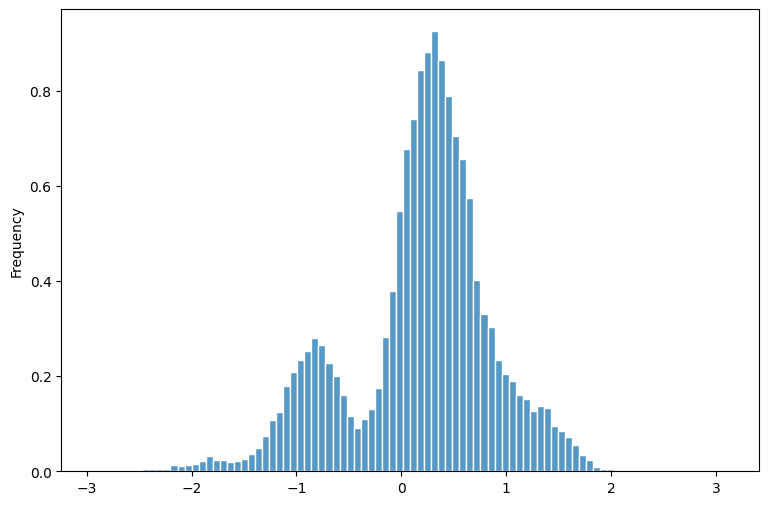

In [20]:
plt.figure(figsize=FIGSIZE)
sns.histplot(
    samples2[BURN_IN:],
    stat="density",
    # kde=True,
    # color="black",
    edgecolor="white",
    linewidth=1,
    bins=90,
)
plt.ylabel("Frequency")

In [22]:
df = pd.DataFrame(samples2[BURN_IN:])
df.to_csv("sample2.csv")

In [23]:
running_means2 = RunningMeans(samples2[BURN_IN:])

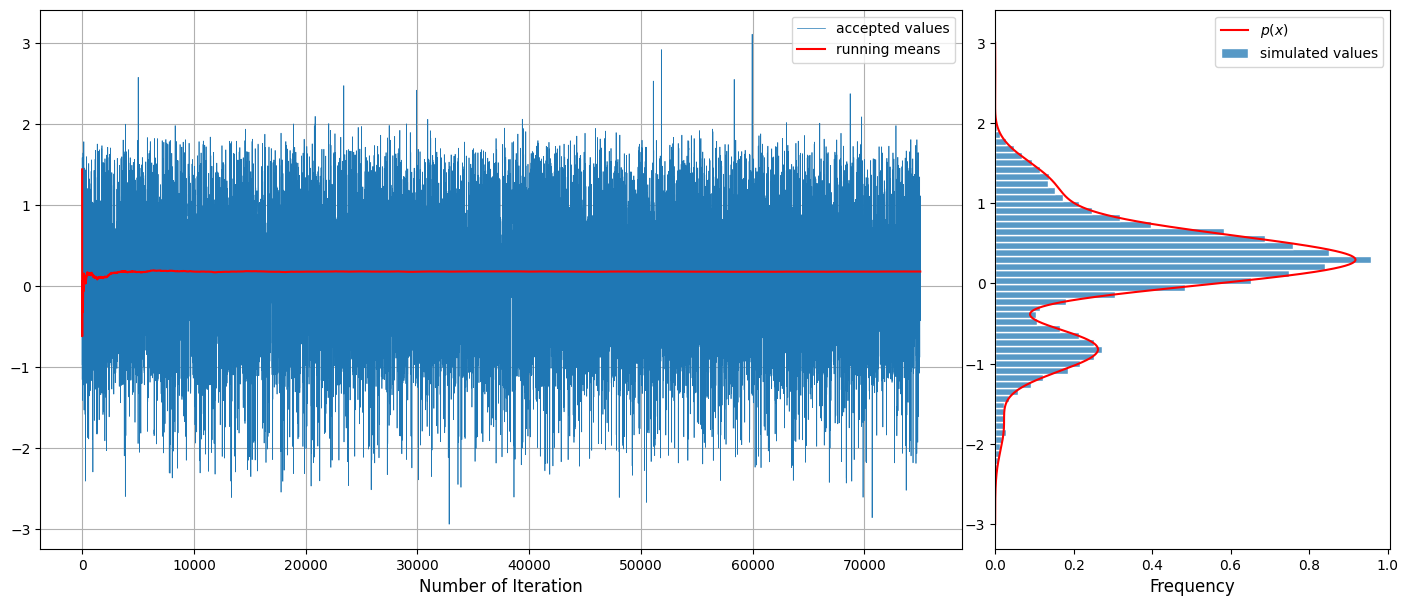

In [24]:
# Create subplots with specified width ratios
fig, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={"width_ratios": [7, 3]})
plt.subplots_adjust(right=0.8, wspace=0.05)

# First subplot: line plot
axs[0].grid()
sns.lineplot(
    ax=axs[0],
    x=range(SAMPLESIZE - BURN_IN),
    # color="k",
    linewidth=0.5,
    y=samples2[BURN_IN:],
    label="accepted values",
)
sns.lineplot(
    ax=axs[0],
    x=range(len(running_means2)),
    y=running_means2,
    color="red",
    label="running means",
)
axs[0].set_xlabel("Number of Iteration", fontsize=12)
# axs[0].set_ylabel("Accepted Value", fontsize=12)

# Second subplot: histogram plot
sns.histplot(
    ax=axs[1],
    y=samples2[BURN_IN:],
    stat="density",
    # color="black",
    edgecolor="white",
    # kde=True,
    linewidth=1,
    bins=70,
    label="simulated values",
)
plt.plot(y, x, color="r", label=r"$p(x)$")
axs[1].set_xlabel("Frequency", fontsize=12)

plt.legend()
# Show the plot
plt.show()

## Sample 3

inetial state = -4 , step size=1


In [25]:
samples3 = MetropolisSample(target, init_state=-4, step_size=1)
print(f"Mean: {np.mean(samples3):.4f}\nVariance: {np.var(samples3):.4f}")

Mean: 0.1737
Variance: 0.4673


Text(0, 0.5, 'Accepted Value')

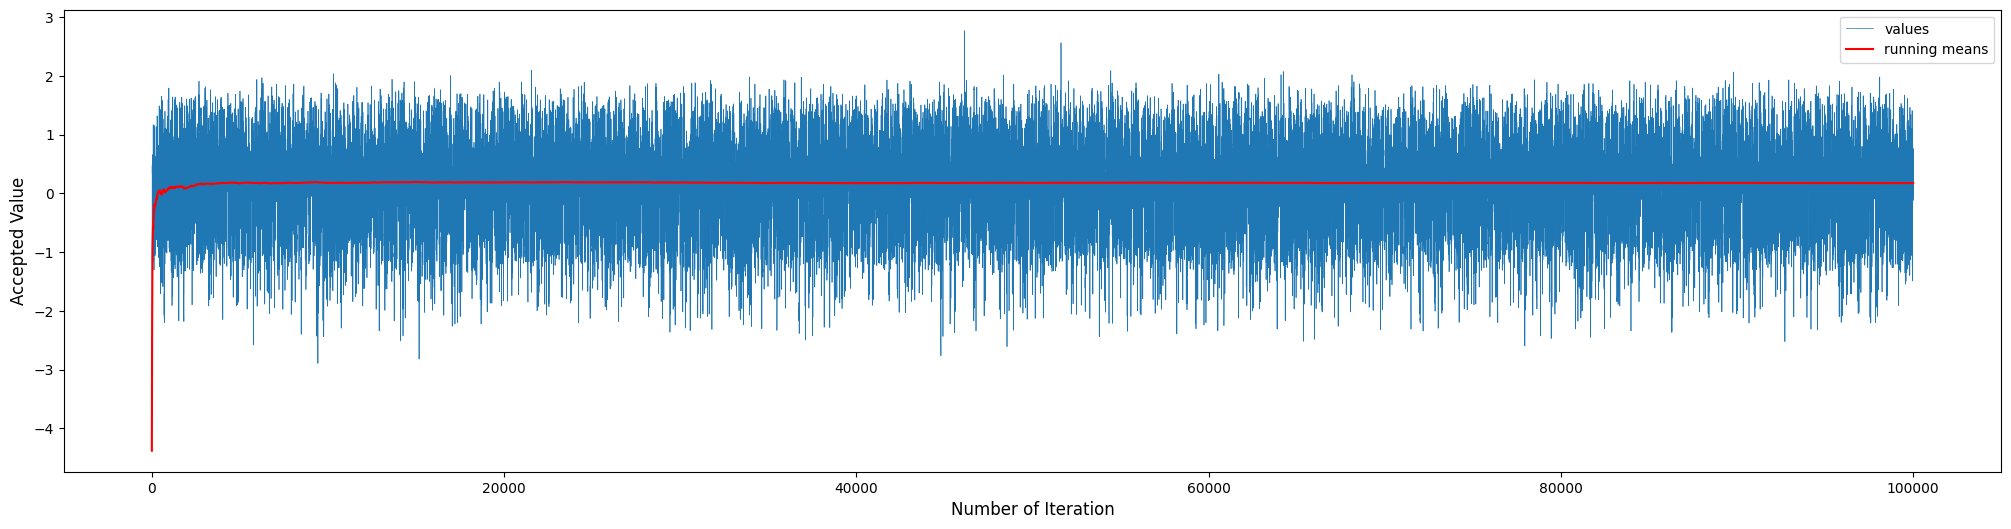

In [27]:
plt.figure(figsize=(25, 6))
sns.lineplot(
    x=range(SAMPLESIZE), 
    y=samples3, 
    # color="k",
    linewidth=0.5,
    label="values"
)
sns.lineplot(
    x=range(SAMPLESIZE),
    y=RunningMeans(samples3),
    color="r",
    label="running means",
)
plt.xlabel("Number of Iteration", fontsize=12)
plt.ylabel("Accepted Value", fontsize=12)

In [28]:
# reboving burn-in
print(f"Mean: {samples3[BURN_IN:].mean():.4f}")
print(f"Variance: {samples3[BURN_IN:].var():.4f}")

Mean: 0.1695
Variance: 0.4686


In [29]:
df = pd.DataFrame(samples3[BURN_IN:])
df.to_csv("sample3.csv")

Text(0, 0.5, 'Frequency')

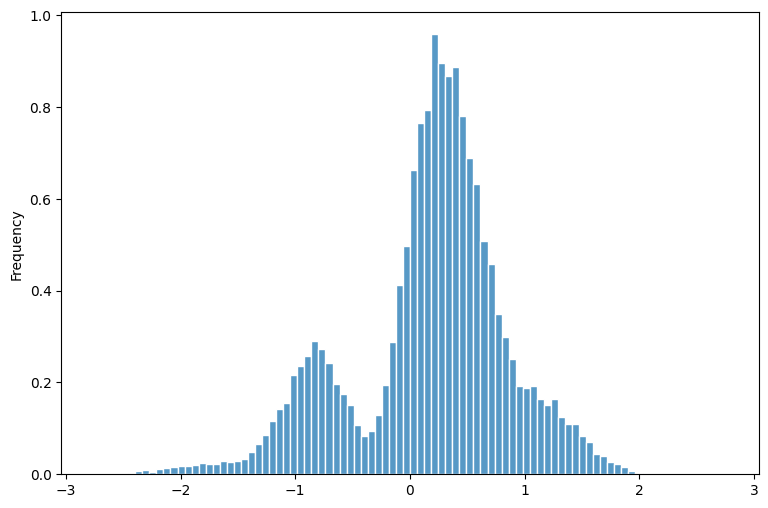

In [30]:
plt.figure(figsize=FIGSIZE)
sns.histplot(
    samples3[BURN_IN:],
    stat="density",
    # kde=True,
    # color="black",
    edgecolor="white",
    linewidth=1,
    bins=90,
)
plt.ylabel("Frequency")

In [31]:
running_means3 = RunningMeans(samples3[BURN_IN:])

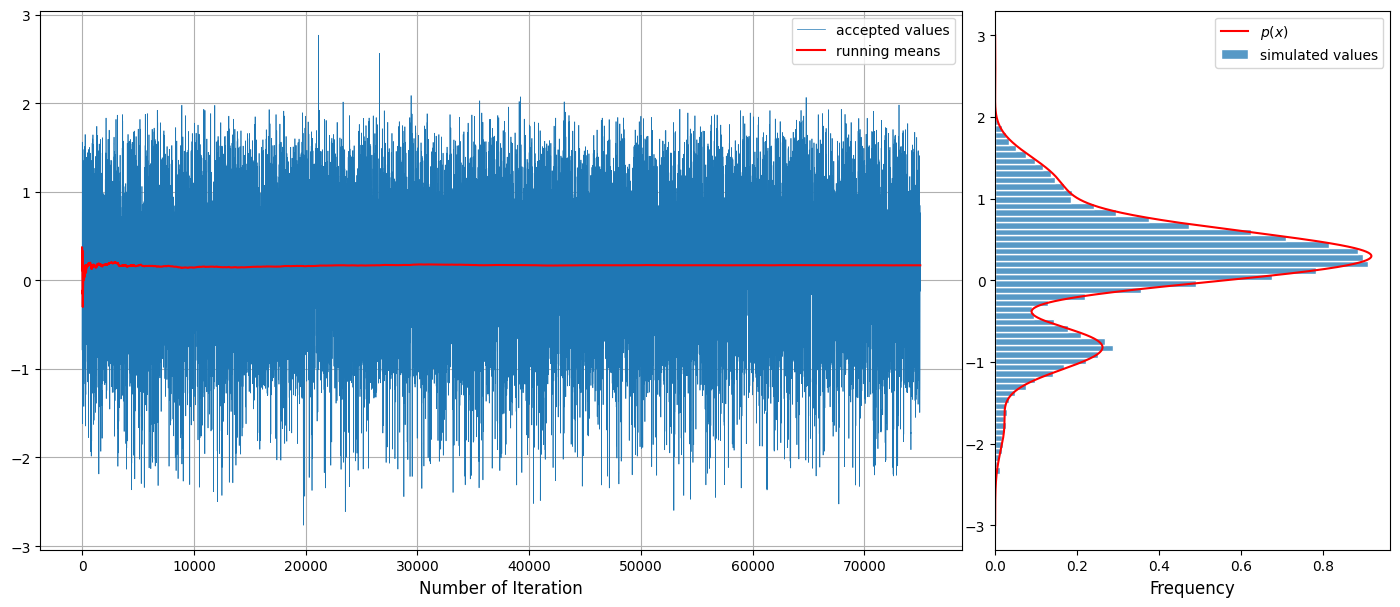

In [32]:
# Create subplots with specified width ratios
fig, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={"width_ratios": [7, 3]})
plt.subplots_adjust(right=0.8, wspace=0.05)

# First subplot: line plot
axs[0].grid()
sns.lineplot(
    ax=axs[0],
    x=range(SAMPLESIZE - BURN_IN),
    # color="k",
    linewidth=0.5,
    y=samples3[BURN_IN:],
    label="accepted values",
)
sns.lineplot(
    ax=axs[0],
    x=range(len(running_means3)),
    y=running_means3,
    color="red",
    label="running means",
)
axs[0].set_xlabel("Number of Iteration", fontsize=12)
# axs[0].set_ylabel("Accepted Value", fontsize=12)

# Second subplot: histogram plot
sns.histplot(
    ax=axs[1],
    y=samples3[BURN_IN:],
    stat="density",
    # color="black",
    edgecolor="white",
    # kde=True,
    linewidth=1,
    bins=70,
    label="simulated values",
)
plt.plot(y, x, color="r", label=r"$p(x)$")
axs[1].set_xlabel("Frequency", fontsize=12)

plt.legend()
# Show the plot
plt.show()

# Sample 4

init = 10 step = 2


In [33]:
samples4 = MetropolisSample(target, init_state=10, step_size=2)
print(f"Mean: {np.mean(samples4):0.5f}\nVariance: {np.var(samples4):0.4f}")

Mean: 0.19084
Variance: 0.4707


Text(0, 0.5, 'Accepted Value')

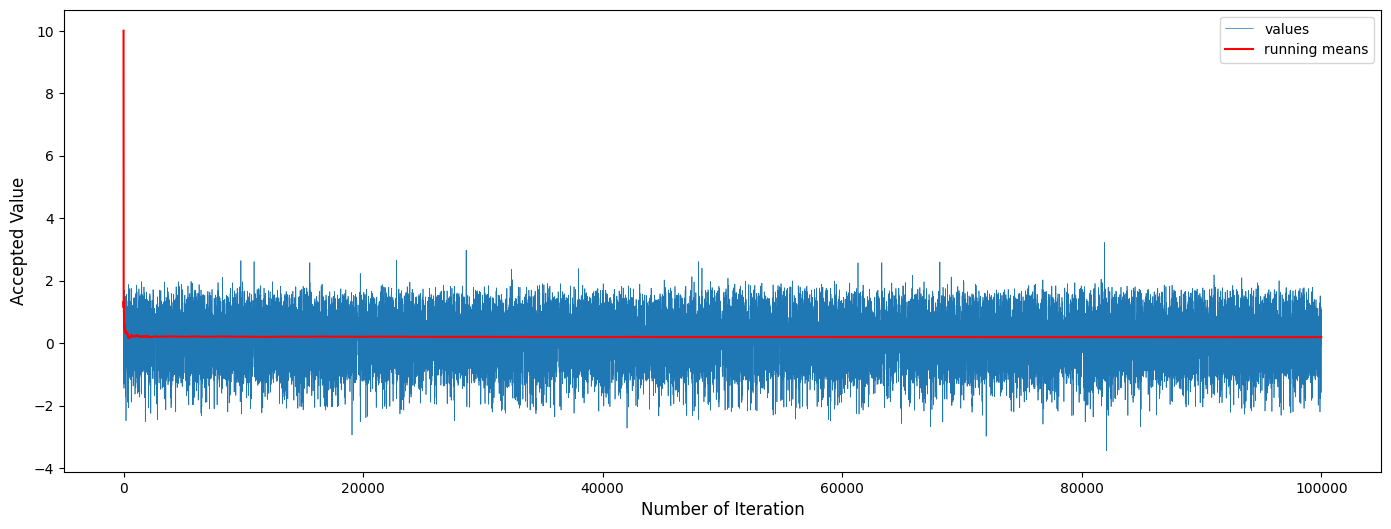

In [36]:
plt.figure(figsize=(17, 6))
sns.lineplot(
    x=range(SAMPLESIZE),
    y=samples4,
    # color="k", 
    linewidth=0.5, 
    label="values"
)
sns.lineplot(
    x=range(SAMPLESIZE),
    y=RunningMeans(samples4),
    color="r",
    label="running means",
)
plt.xlabel("Number of Iteration", fontsize=12)
plt.ylabel("Accepted Value", fontsize=12)

In [37]:
# reboving burn-in
print(f"Mean: {samples3[BURN_IN:].mean():0.4f}")
print(f"Variance: {samples3[BURN_IN:].var():.4f}")

Mean: 0.1695
Variance: 0.4686


Text(0.5, 0, 'Number of Iteration')

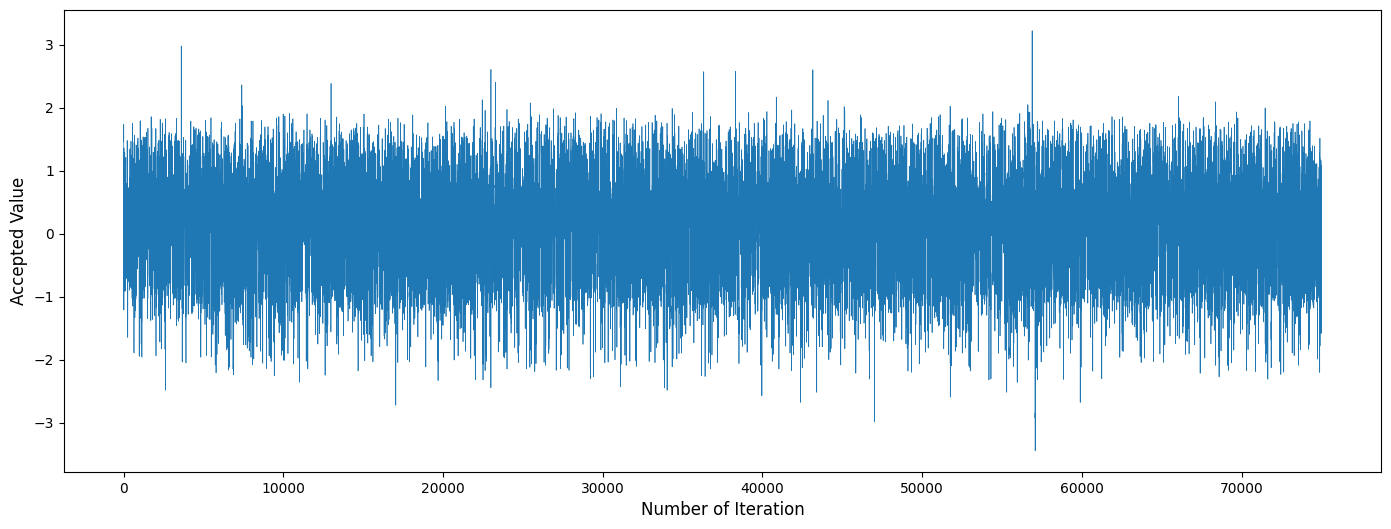

In [38]:
plt.figure(figsize=(17, 6))
sns.lineplot(
    x=range(SAMPLESIZE - BURN_IN), y=samples4[BURN_IN:], linewidth=0.5
)
plt.ylabel("Accepted Value", fontsize=12)
plt.xlabel("Number of Iteration", fontsize=12)

In [39]:
df = pd.DataFrame(samples4[BURN_IN:])
df.to_csv("sample4.csv")

Text(0, 0.5, 'Frequency')

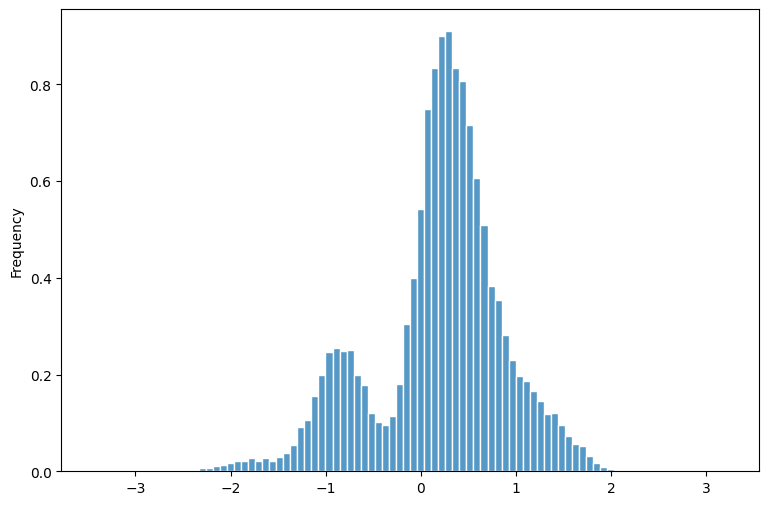

In [40]:
plt.figure(figsize=FIGSIZE)
sns.histplot(
    samples4[BURN_IN:],
    stat="density",
    # kde=True,
    # color="black",
    edgecolor="white",
    linewidth=1,
    bins=90,
)
plt.ylabel("Frequency")

In [41]:
running_means4 = RunningMeans(samples4[BURN_IN:])

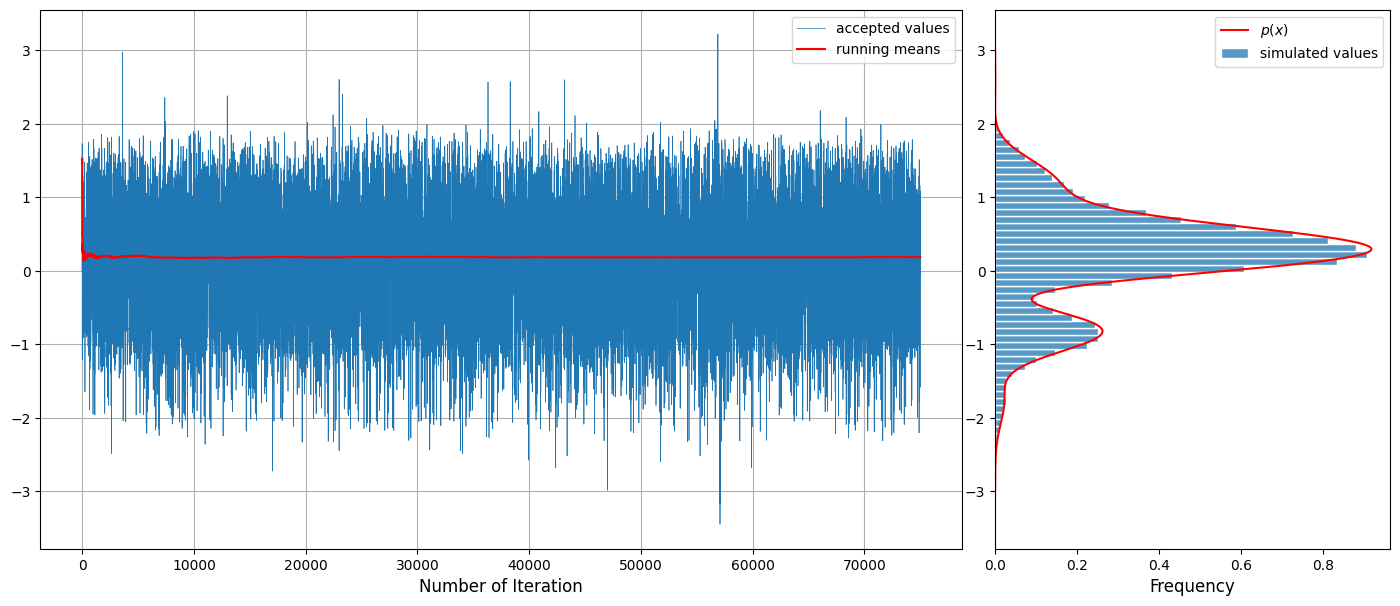

In [42]:
# Create subplots with specified width ratios
fig, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={"width_ratios": [7, 3]})
plt.subplots_adjust(right=0.8, wspace=0.05)

# First subplot: line plot
axs[0].grid()
sns.lineplot(
    ax=axs[0],
    x=range(SAMPLESIZE - BURN_IN),
    # color="k",
    linewidth=0.5,
    y=samples4[BURN_IN:],
    label="accepted values",
)
sns.lineplot(
    ax=axs[0],
    x=range(len(running_means4)),
    y=running_means4,
    color="red",
    label="running means",
)
axs[0].set_xlabel("Number of Iteration", fontsize=12)
# axs[0].set_ylabel("Accepted Value", fontsize=12)

# Second subplot: histogram plot
sns.histplot(
    ax=axs[1],
    y=samples4[BURN_IN:],
    stat="density",
    # color="black",
    edgecolor="white",
    # kde=True,
    linewidth=1,
    bins=70,
    label="simulated values",
)
plt.plot(y, x, color="r", label=r"$p(x)$")
axs[1].set_xlabel("Frequency", fontsize=12)

plt.legend()
# Show the plot
plt.show()

# Bad initial state and jumping function

## sample 5

inti 10 step = 0.025


In [43]:
samples5 = MetropolisSample(target, init_state=10, step_size=0.025)
print(f"Mean: {np.mean(samples5):.4f}\nVariance: {np.var(samples5):.4f}")

Mean: 0.2468
Variance: 1.6672


Text(0, 0.5, 'Accepted Value')

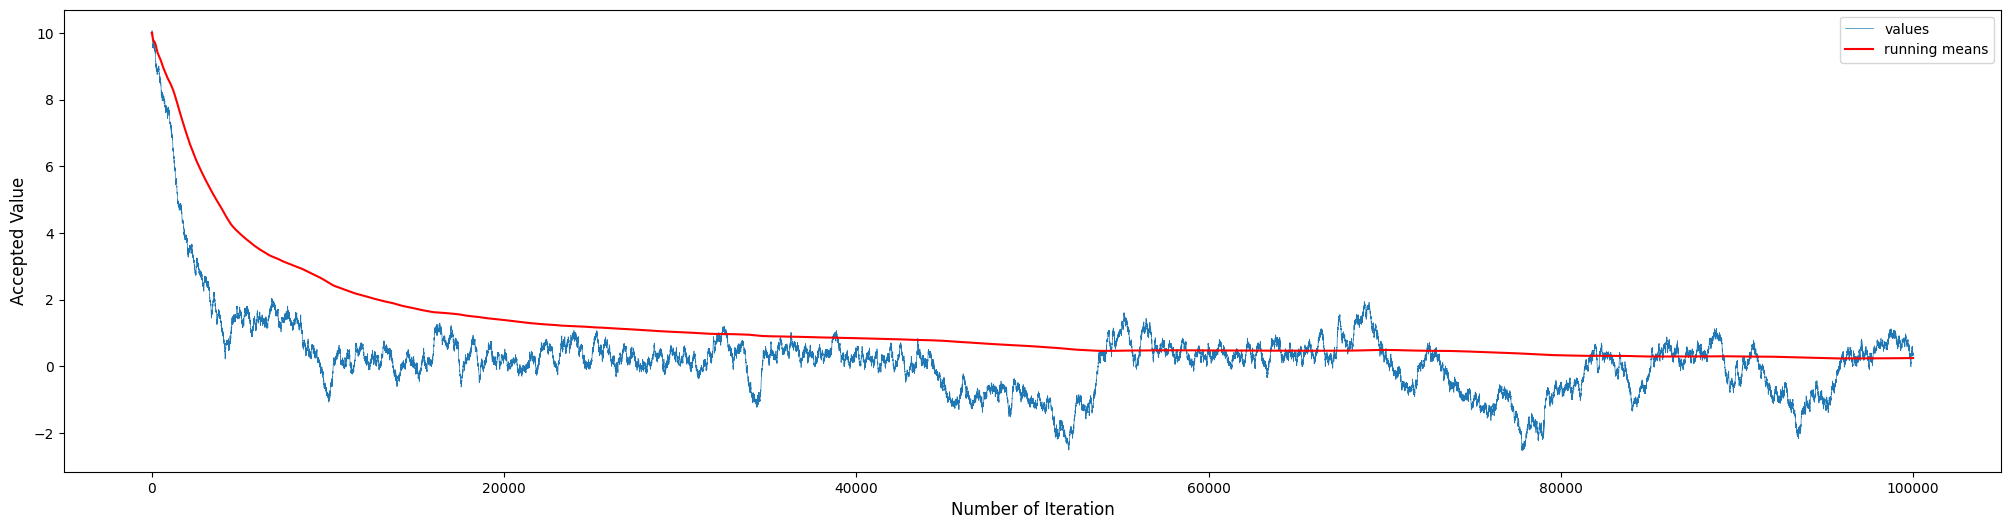

In [44]:
plt.figure(figsize=(25, 6))
sns.lineplot(x=range(SAMPLESIZE), y=samples5, linewidth=0.5, label="values")
sns.lineplot(
    x=range(SAMPLESIZE),
    y=RunningMeans(samples5),
    color="r",
    label="running means",
)
plt.xlabel("Number of Iteration", fontsize=12)
plt.ylabel("Accepted Value", fontsize=12)

In [45]:
# reboving burn-in
print(f"Mean: {samples5[BURN_IN:].mean():.4f}")
print(f"Variance: {samples5[BURN_IN:].var():.4f}")

Mean: -0.0610
Variance: 0.5842


In [46]:
df = pd.DataFrame(samples5[BURN_IN:])
df.to_csv("sample5.csv")

Text(0, 0.5, 'Frequency')

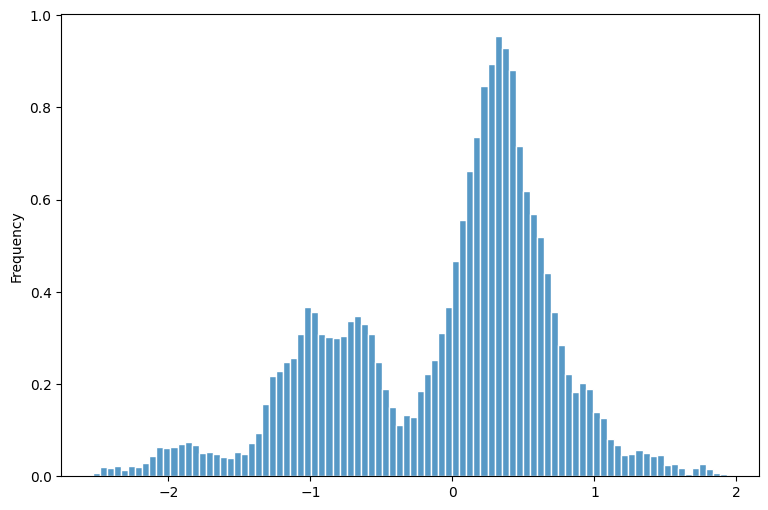

In [47]:
plt.figure(figsize=FIGSIZE)
sns.histplot(
    samples5[BURN_IN:],
    stat="density",
    # kde=True,
    # color="black",
    edgecolor="white",
    linewidth=1,
    bins=90,
)
plt.ylabel("Frequency")

In [48]:
running_means5 = RunningMeans(samples5[BURN_IN:])

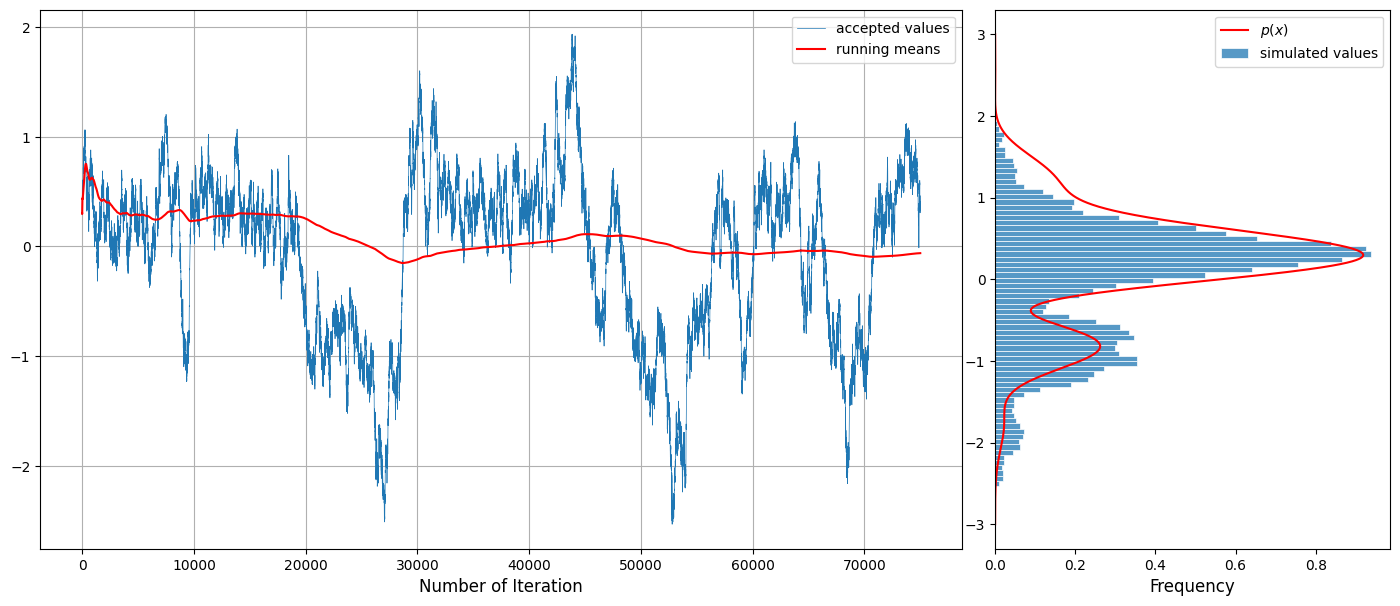

In [49]:
# Create subplots with specified width ratios
fig, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={"width_ratios": [7, 3]})
plt.subplots_adjust(right=0.8, wspace=0.05)

# First subplot: line plot
axs[0].grid()
sns.lineplot(
    ax=axs[0],
    x=range(SAMPLESIZE - (BURN_IN)),
    # color="k",
    linewidth=0.5,
    y=samples5[BURN_IN:],
    label="accepted values",
)
sns.lineplot(
    ax=axs[0],
    x=range(len(running_means5)),
    y=running_means5,
    color="red",
    label="running means",
)
axs[0].set_xlabel("Number of Iteration", fontsize=12)
# axs[0].set_ylabel("Accepted Value", fontsize=12)

# Second subplot: histogram plot
sns.histplot(
    ax=axs[1],
    y=samples5[BURN_IN:],
    stat="density",
    # color="black",
    edgecolor="white",
    linewidth=0.5,
    # kde=True,
    bins=70,
    label="simulated values",
)
plt.plot(y, x, color="r", label=r"$p(x)$")
axs[1].set_xlabel("Frequency", fontsize=12)

plt.legend()
# Show the plot
plt.show()

# sample 6

init state 15, step 20


In [50]:
samples6 = MetropolisSample(target, init_state=15, step_size=20)
print(f"Mean: {np.mean(samples6):.5f}\nVariance: {np.var(samples6):.5f}")

Mean: 0.19340
Variance: 0.44209


Text(0, 0.5, 'Accepted Value')

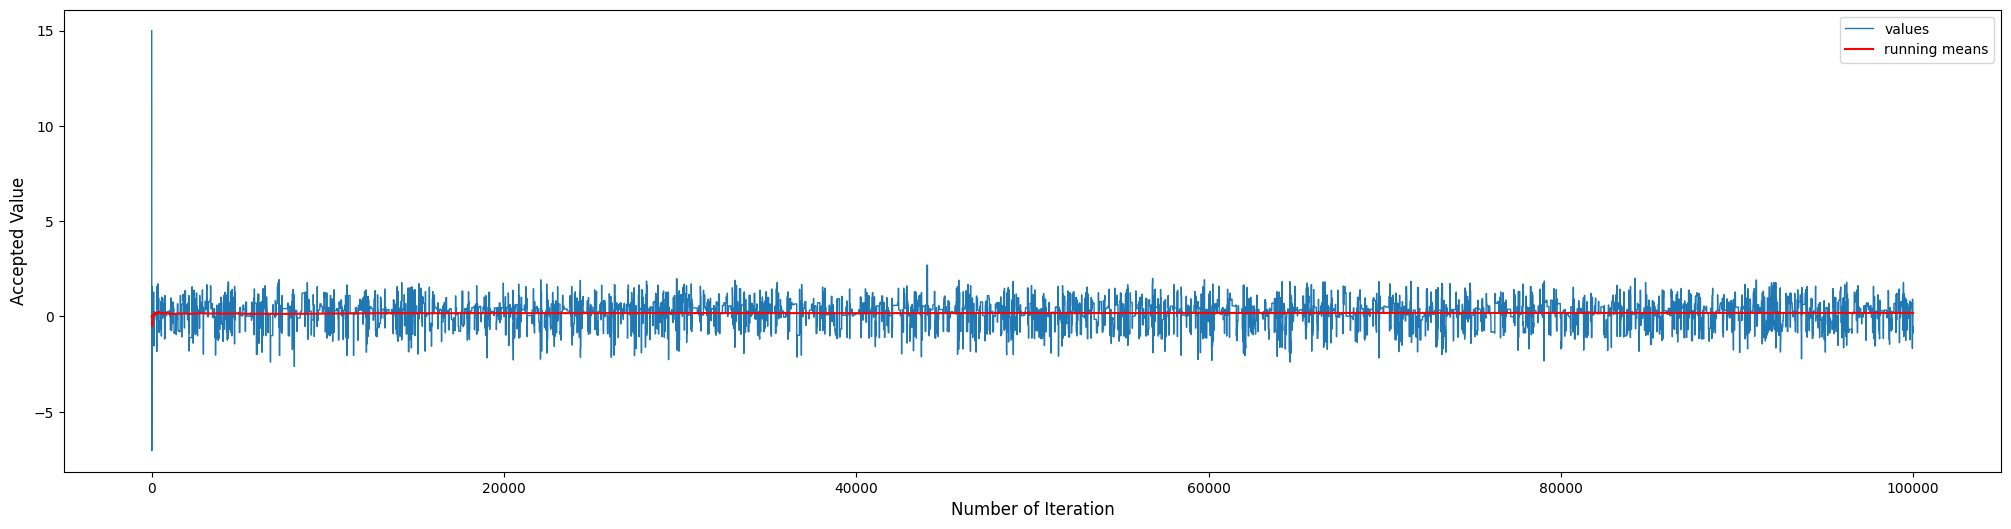

In [51]:
plt.figure(figsize=(25, 6))
sns.lineplot(x=range(SAMPLESIZE), y=samples6, linewidth=1, label="values")
sns.lineplot(
    x=range(SAMPLESIZE),
    y=RunningMeans(samples),
    color="r",
    label="running means",
)
plt.xlabel("Number of Iteration", fontsize=12)
plt.ylabel("Accepted Value", fontsize=12)

In [52]:
# reboving burn-in
print(f"Mean: {samples6[BURN_IN:].mean()}")
print(f"Variance: {samples6[BURN_IN:].var()}")

Mean: 0.20557599900336576
Variance: 0.43452875111004796


In [53]:
df = pd.DataFrame(samples6[BURN_IN:])
df.to_csv("sample6.csv")

Text(0, 0.5, 'Frequency')

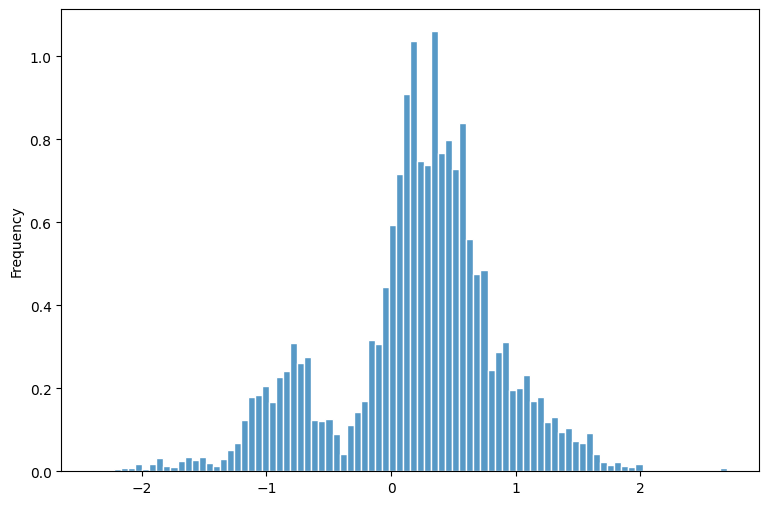

In [54]:
plt.figure(figsize=FIGSIZE)
sns.histplot(
    samples6[BURN_IN:],
    stat="density",
    # kde=True,
    # color="black",
    edgecolor="white",
    linewidth=1,
    bins=90,
)
plt.ylabel("Frequency")

In [55]:
running_means6 = RunningMeans(samples6[BURN_IN:])

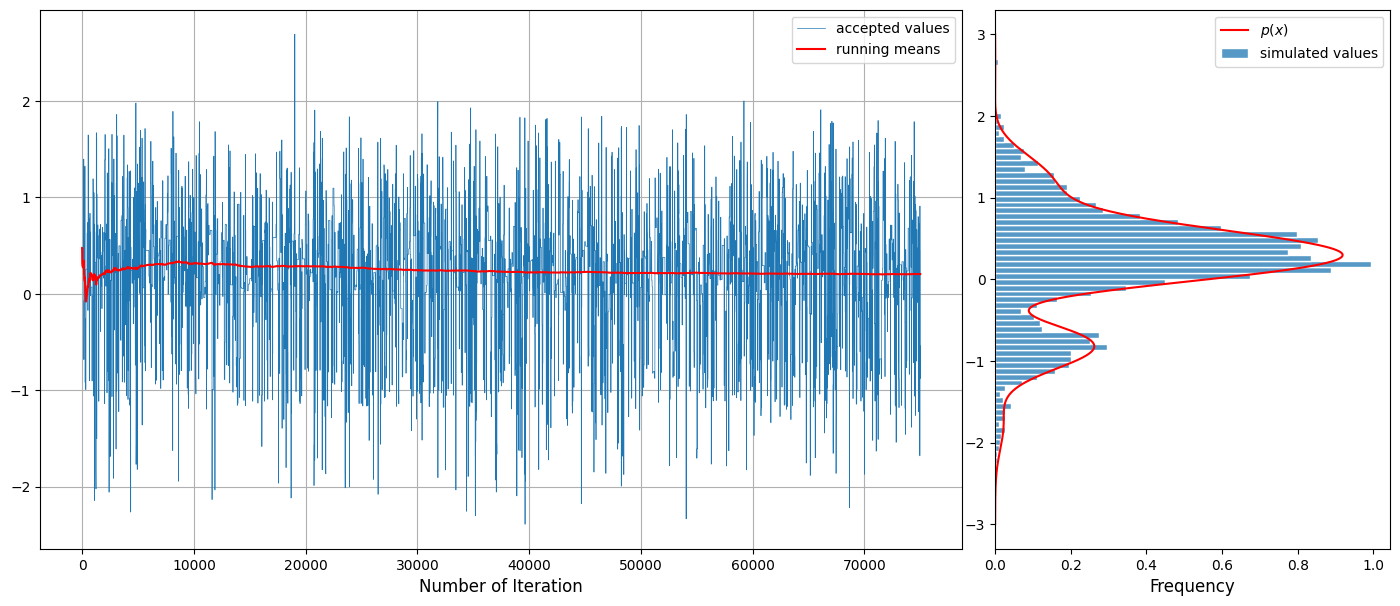

In [56]:
# Create subplots with specified width ratios
fig, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={"width_ratios": [7, 3]})
plt.subplots_adjust(right=0.8, wspace=0.05)

# First subplot: line plot
axs[0].grid()
sns.lineplot(
    ax=axs[0],
    x=range(SAMPLESIZE - BURN_IN),
    # color="k",
    linewidth=0.5,
    y=samples6[BURN_IN:],
    label="accepted values",
)
sns.lineplot(
    ax=axs[0],
    x=range(len(running_means6)),
    y=running_means6,
    color="red",
    label="running means",
)
axs[0].set_xlabel("Number of Iteration", fontsize=12)
# axs[0].set_ylabel("Accepted Value", fontsize=12)

# Second subplot: histogram plot
sns.histplot(
    ax=axs[1],
    y=samples6[BURN_IN:],
    stat="density",
    # color="black",
    # kde=True,
    edgecolor="white",
    linewidth=1,
    bins=70,
    label="simulated values",
)
plt.plot(y, x, color="r", label=r"$p(x)$")
axs[1].set_xlabel("Frequency", fontsize=12)

plt.legend()
# Show the plot
plt.show()